##Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn.model_selection import train_test_split
import tensorflow as tf
import datetime, os
from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from keras.utils import np_utils

#Punto 1

Seleccione un conjunto de datos ubicados en
el siguiente enlace para un problema de clasificación
(diferente al wine y al iris data set):
https://archive.ics.uci.edu/ml/index.html Entrene una
red neuronal MLP superficial y profunda que realice
la clasificación definida para el problema seleccionado
usando Tensorflow-Keras. Tenga en cuenta entrenar y
validar la red con datos no usados en el proceso de
entrenamiento.


##Read Data

Se elige trabajar con el dataset car del repositorio:

 El modelo evalúa los automóviles de acuerdo con la siguiente estructura conceptual:

Aceptabilidad del automóvil CAR
- PRECIO precio total
  - Compra precio de compra
  - Maint precio del mantenimiento
- Características técnicas TECH
  - CONFORT comodidad
   - Puertas número de puertas
   - Capacidad de personas en términos de personas a transportar
   - Lug_boot el tamaño del maletero
  - Seguridad seguridad estimada del automóvil

In [3]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data')
print(data.shape)
data.head(10)

input_dim=6

(1727, 7)


Se cambia los datos categóricos a númericos.

In [ ]:
data['X1'][data['X1'] == 'vhigh'] = 3
data['X1'][data['X1'] == 'high'] = 2
data['X1'][data['X1'] == 'med'] = 1
data['X1'][data['X1'] == 'low'] = 0

data['X2'][data['X2'] == 'vhigh'] = 3
data['X2'][data['X2'] == 'high'] = 2
data['X2'][data['X2'] == 'med'] = 1
data['X2'][data['X2'] == 'low'] = 0

data['X3'][data['X3'] == '5more'] = 5

data['X4'][data['X4'] == 'more'] = 5

data['X5'][data['X5'] == 'big'] = 2
data['X5'][data['X5'] == 'med'] = 1
data['X5'][data['X5'] == 'small'] = 0

data['X6'][data['X6'] == 'low'] = 2
data['X6'][data['X6'] == 'med'] = 1
data['X6'][data['X6'] == 'high'] = 0

data['Y1'][data['Y1'] == 'vgood'] = 3
data['Y1'][data['Y1'] == 'good'] = 2
data['Y1'][data['Y1'] == 'acc'] = 1
data['Y1'][data['Y1'] == 'unacc'] = 0


data.head(10)

,X1,X2,X3,X4,X5,X6,Y1
0,3,3,2,2,0,2,0
1,3,3,2,2,0,1,0
2,3,3,2,2,0,0,0
3,3,3,2,2,1,2,0
4,3,3,2,2,1,1,0
5,3,3,2,2,1,0,0
6,3,3,2,2,2,2,0
7,3,3,2,2,2,1,0
8,3,3,2,2,2,0,0
9,3,3,2,4,0,2,0


In [ ]:
data['X1'].value_counts()

3    432
2    432
1    432
0    432
Name: X1, dtype: int64

In [ ]:
data['X2'].value_counts()

3    432
2    432
1    432
0    432
Name: X2, dtype: int64

In [ ]:
data['X3'].value_counts()

2    432
3    432
4    432
5    432
Name: X3, dtype: int64

In [ ]:
data['X4'].value_counts()

2    576
4    576
5    576
Name: X4, dtype: int64

In [ ]:
data['X5'].value_counts()

0    576
1    576
2    576
Name: X5, dtype: int64

In [ ]:
data['X6'].value_counts()

2    576
1    576
0    576
Name: X6, dtype: int64

In [ ]:
data['Y1'].value_counts()

0    1210
1     384
2      69
3      65
Name: Y1, dtype: int64

##Normalizar Data

In [ ]:
x1=pd.to_numeric(data['X1'].values)
x2=pd.to_numeric(data['X2'].values)
x3=pd.to_numeric(data['X3'].values)
x4=pd.to_numeric(data['X4'].values)
x5=pd.to_numeric(data['X5'].values)
x6=pd.to_numeric(data['X6'].values)

y1=pd.to_numeric(data['Y1'].values)
print(y1.shape)

(1728,)


In [ ]:
def normalizar (x,xmax,xmin,ymax,ymin):
  m=(ymax-ymin)/(xmax-xmin)
  b=ymin-m*xmin

  y=m*x+b
  return y

In [ ]:
x1_n=normalizar(x1,np.max(x1),np.min(x1),1,-1)
x2_n=normalizar(x2,np.max(x2),np.min(x2),1,-1)
x3_n=normalizar(x3,np.max(x3),np.min(x3),1,-1)
x4_n=normalizar(x4,np.max(x4),np.min(x4),1,-1)
x5_n=normalizar(x5,np.max(x5),np.min(x5),1,-1)
x6_n=normalizar(x6,np.max(x6),np.min(x6),1,-1)

In [ ]:
x_n=np.transpose(np.array([x1_n, x2_n, x3_n, x4_n, x5_n, x6_n]))
print(x_n.shape)

(1728, 6)


##Partición de data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_n, y1, test_size = 0.30, random_state=12)

##One hot-encoding

In [ ]:
y_train1 = np_utils.to_categorical(y_train)
y_test1 = np_utils.to_categorical(y_test)

num_class = y_train1.shape[1]

print(y_train1.shape)
print(y_test1.shape)
print(num_class)

(1209, 4)
(519, 4)
4


##Modelo Superficial

In [ ]:
def modelS():
  model = Sequential()
  
  model.add(Dense(6, input_dim = 6, activation = 'tanh'))
  model.add(Dense(num_class, activation = 'softmax'))

  model.summary()

  #Compile
  model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics=['accuracy'])

  return model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 42        
                                                                 
 dense_1 (Dense)             (None, 4)                 28        
                                                                 
Total params: 70
Trainable params: 70
Non-trainable params: 0
_________________________________________________________________


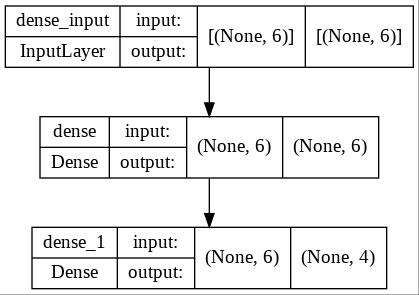

In [ ]:
modelS=modelS()
plot_model(modelS, to_file='modelSuperficial.jpg', show_shapes=True)

In [ ]:
logdir=os.path.join("logs", "ModelSuperficial")
tensorboard_callbackS=tf.keras.callbacks.TensorBoard(logdir,histogram_freq=1)

In [ ]:
print(y_train.dtype)

int64


In [ ]:
historyS = modelS.fit(x_train,y_train1, validation_data=(x_test,y_test1), epochs=400, batch_size=10, shuffle=True, callbacks=[tensorboard_callbackS])

Epoch 1/400
121/121 [==============================] - 1s 6ms/step - loss: 0.1908 - accuracy: 0.3093 - val_loss: 0.1736 - val_accuracy: 0.4181
Epoch 2/400
121/121 [==============================] - 1s 5ms/step - loss: 0.1576 - accuracy: 0.5103 - val_loss: 0.1445 - val_accuracy: 0.5954
Epoch 3/400
121/121 [==============================] - 1s 5ms/step - loss: 0.1263 - accuracy: 0.6567 - val_loss: 0.1170 - val_accuracy: 0.6667
Epoch 4/400
121/121 [==============================] - 1s 5ms/step - loss: 0.1008 - accuracy: 0.7320 - val_loss: 0.0972 - val_accuracy: 0.7148
Epoch 5/400
121/121 [==============================] - 1s 4ms/step - loss: 0.0850 - accuracy: 0.7618 - val_loss: 0.0856 - val_accuracy: 0.7476
Epoch 6/400
121/121 [==============================] - 1s 5ms/step - loss: 0.0761 - accuracy: 0.7874 - val_loss: 0.0783 - val_accuracy: 0.7649
Epoch 7/400
121/121 [==============================] - 1s 5ms/step - loss: 0.0703 - accuracy: 0.8040 - val_loss: 0.0738 - val_accuracy: 0.7784

In [ ]:
scoreS = modelS.evaluate(x_test,y_test1, verbose=0)
print(scoreS)

[0.023187700659036636, 0.9402697682380676]


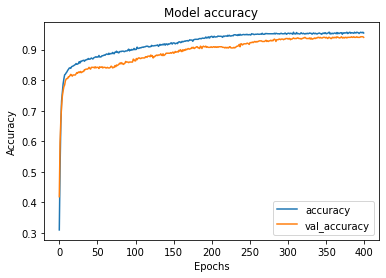

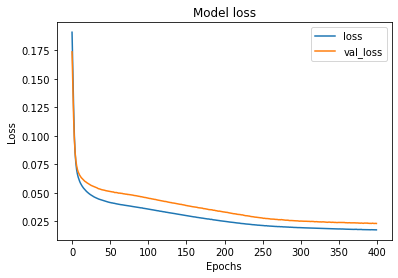

In [ ]:
plt.figure()
plt.plot(historyS.history['accuracy'], label='accuracy')
plt.plot(historyS.history['val_accuracy'], label='val_accuracy')
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()

plt.figure()
plt.plot(historyS.history['loss'], label='loss')
plt.plot(historyS.history['val_loss'], label='val_loss')
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'upper right')
plt.show()

In [ ]:
outputTestS = modelS.predict(x_test)

In [ ]:
cmS = confusion_matrix(y_test,np.argmax(outputTestS,axis=1))

In [ ]:
print(cmS)

[[350  11   0   0]
 [  9 105   1   2]
 [  0   4  19   2]
 [  0   2   0  14]]


In [ ]:
def plot_confusion_matrix(cm, num_classes,normalize=True,title='Matrix de Confusion Superficial',cmap=plt.cm.Blues):
      
      import itertools
      
      classes = ['0', '1', '2','3']

      plt.figure(figsize = (7,7))
      plt.imshow(cm, interpolation='nearest', cmap=cmap)
      plt.title(title)
      plt.colorbar()
      tick_marks = np.arange(len(classes))
      plt.xticks(tick_marks, classes, rotation=90)
      plt.yticks(tick_marks, classes)
      if normalize:
          cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
          cm = np.round(cm,3)
      thresh = cm.max() / 2.
      for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, cm[i, j],
                   horizontalalignment="center",
                   color="black" if cm[i, j] > thresh else "black")
      plt.tight_layout()
      plt.ylabel('Original')
      plt.xlabel('Predicciones')

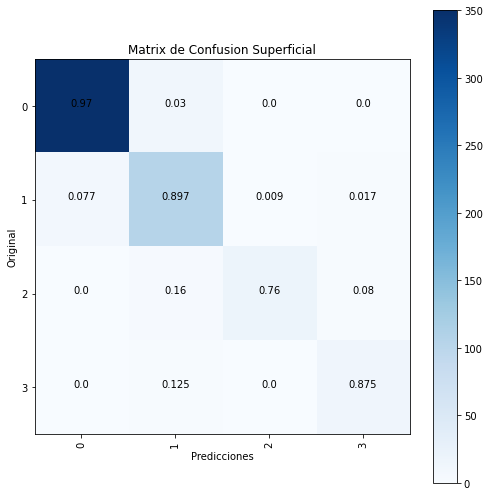

In [ ]:
plot_confusion_matrix(cmS, num_class)

##Modelo Profunda

In [ ]:
def modelP():
  model = Sequential()
  
  model.add(Dense(6, input_dim = input_dim, activation = 'tanh'))
  model.add(Dense(12, activation = 'sigmoid'))
  model.add(Dense(18, activation = 'sigmoid'))
  model.add(Dense(6, activation = 'sigmoid'))
  model.add(Dense(num_class, activation = 'softmax'))

  model.summary()

  #Compile
  model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics=['accuracy'])

  return model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dense_3 (Dense)             (None, 12)                84        
                                                                 
 dense_4 (Dense)             (None, 18)                234       
                                                                 
 dense_5 (Dense)             (None, 6)                 114       
                                                                 
 dense_6 (Dense)             (None, 4)                 28        
                                                                 
Total params: 502
Trainable params: 502
Non-trainable params: 0
_________________________________________________________________


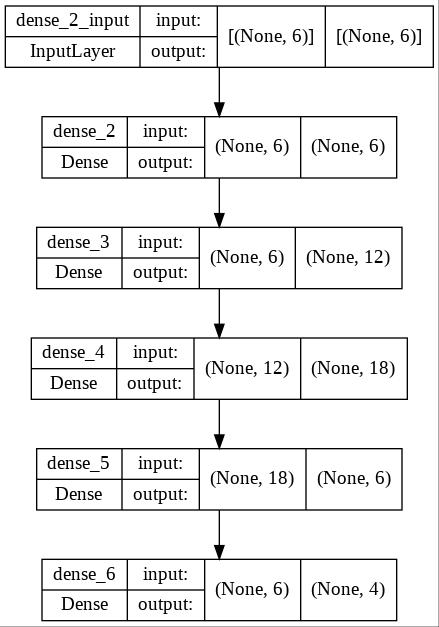

In [ ]:
modelP=modelP()
plot_model(modelP, to_file='modelP.jpg', show_shapes=True)

In [ ]:
logdir=os.path.join("logs", "ModelProfundo")
tensorboard_callbackP=tf.keras.callbacks.TensorBoard(logdir,histogram_freq=1)

In [ ]:
historyP = modelP.fit(x_train,y_train1, validation_data=(x_test,y_test1), epochs=400, batch_size=10, shuffle=True, callbacks=[tensorboard_callbackP])

Epoch 1/400
121/121 [==============================] - 1s 7ms/step - loss: 0.1681 - accuracy: 0.4400 - val_loss: 0.1263 - val_accuracy: 0.6956
Epoch 2/400
121/121 [==============================] - 1s 6ms/step - loss: 0.1182 - accuracy: 0.7022 - val_loss: 0.1166 - val_accuracy: 0.6956
Epoch 3/400
121/121 [==============================] - 1s 5ms/step - loss: 0.1137 - accuracy: 0.7022 - val_loss: 0.1139 - val_accuracy: 0.6956
Epoch 4/400
121/121 [==============================] - 1s 6ms/step - loss: 0.1100 - accuracy: 0.7022 - val_loss: 0.1089 - val_accuracy: 0.6956
Epoch 5/400
121/121 [==============================] - 1s 6ms/step - loss: 0.1013 - accuracy: 0.7022 - val_loss: 0.0968 - val_accuracy: 0.6956
Epoch 6/400
121/121 [==============================] - 1s 5ms/step - loss: 0.0864 - accuracy: 0.7089 - val_loss: 0.0816 - val_accuracy: 0.7322
Epoch 7/400
121/121 [==============================] - 1s 6ms/step - loss: 0.0736 - accuracy: 0.8147 - val_loss: 0.0724 - val_accuracy: 0.8112

In [ ]:
score = modelS.evaluate(x_test,y_test1, verbose=0)
print(score)

[0.023187700659036636, 0.9402697682380676]


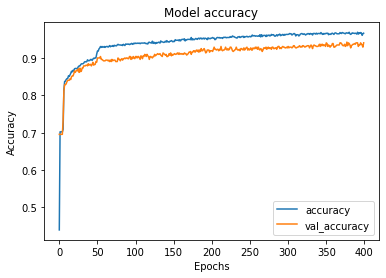

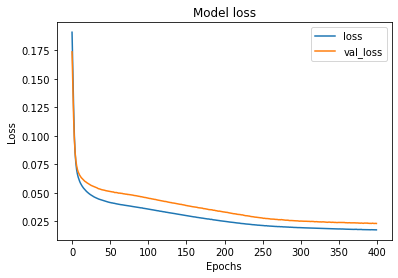

In [ ]:
plt.figure()
plt.plot(historyP.history['accuracy'], label='accuracy')
plt.plot(historyP.history['val_accuracy'], label='val_accuracy')
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()

plt.figure()
plt.plot(historyS.history['loss'], label='loss')
plt.plot(historyS.history['val_loss'], label='val_loss')
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'upper right')
plt.show()

In [ ]:
outputTestP = modelP.predict(x_test)
print(outputTestP.shape)
print(y_test.shape)
print(y_test[0])

(519, 4)
(519,)
1


In [ ]:
cmP = confusion_matrix(y_test,np.argmax(outputTestP,axis=1))

In [ ]:
print(cmP)

[[359   2   0   0]
 [  8 104   3   2]
 [  0   5  11   9]
 [  0   1   1  14]]


In [ ]:
def plot_confusion_matrix(cm, num_classes,normalize=False,title='Matrix de Confusion Profunda',cmap=plt.cm.Blues):
      
      import itertools
      
      classes = ['0', '1', '2','3']

      plt.figure(figsize = (7,7))
      plt.imshow(cm, interpolation='nearest', cmap=cmap)
      plt.title(title)
      plt.colorbar()
      tick_marks = np.arange(len(classes))
      plt.xticks(tick_marks, classes, rotation=90)
      plt.yticks(tick_marks, classes)
      if normalize:
          cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
          cm = np.round(cm,3)
      thresh = cm.max() / 2.
      for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, cm[i, j],
                   horizontalalignment="center",
                   color="black" if cm[i, j] > thresh else "black")
      plt.tight_layout()
      plt.ylabel('Original')
      plt.xlabel('Predicciones')

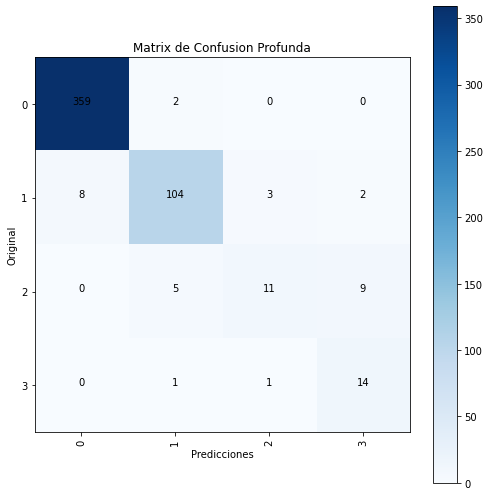

In [ ]:
plot_confusion_matrix(cmP, num_class)

#Punto 2

En el siguiente enlace se resuelve el problema
de clasificación de imágenes definido por el data set
Cifar10 usando una red neuronal convolucional
https://cs.stanford.edu/people/karpathy/convnetjs/demo/cifar10.html

Entrene una red neuronal
convolucional en Tensorflow-Keras que
resuelva este problema

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD

##Load Data

In [ ]:
from keras.datasets import cifar10
(x_traini, y_traini), (x_testi, y_testi) = cifar10.load_data()

##One hot encode

In [ ]:
trainY=np_utils.to_categorical(y_traini)
testY=np_utils.to_categorical(y_testi)

num_class = y_traini.shape[1]
input_shape = x_traini.shape[1:]
print(input_shape)
print(num_class)

(32, 32, 3)
1


In [ ]:
def prep_pixels(train, test):
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
 
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
  
	return train_norm, test_norm

trainX, testX = prep_pixels(x_traini, x_testi)

##Modelo Convolucional

In [ ]:
def modelcn():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2))

  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2))

  model.add(Flatten())

  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dropout(0.2))
  model.add(Dense(10, activation='softmax'))

  model.summary()

  opt = SGD(lr=0.01, momentum=0.9)

  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

  return model

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


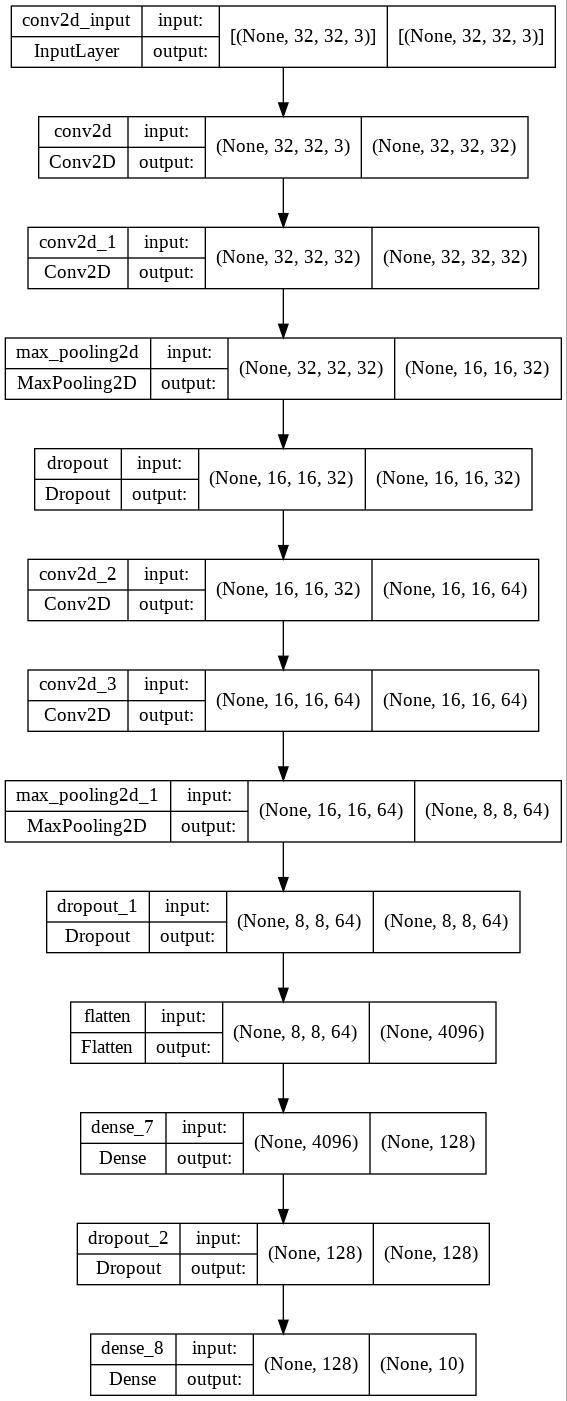

In [ ]:
modelcn=modelcn()
plot_model(modelcn, to_file='modelcn.jpg', show_shapes=True)

In [ ]:
historycn = modelcn.fit(trainX, trainY, epochs=20, batch_size=64, validation_data=(testX, testY), shuffle=True)

Epoch 1/20
782/782 [==============================] - 16s 18ms/step - loss: 1.7278 - accuracy: 0.3715 - val_loss: 1.4137 - val_accuracy: 0.4948
Epoch 2/20
782/782 [==============================] - 14s 17ms/step - loss: 1.2801 - accuracy: 0.5393 - val_loss: 1.1004 - val_accuracy: 0.6054
Epoch 3/20
782/782 [==============================] - 13s 17ms/step - loss: 1.0798 - accuracy: 0.6170 - val_loss: 0.9523 - val_accuracy: 0.6626
Epoch 4/20
782/782 [==============================] - 13s 17ms/step - loss: 0.9480 - accuracy: 0.6656 - val_loss: 0.8668 - val_accuracy: 0.6998
Epoch 5/20
782/782 [==============================] - 14s 17ms/step - loss: 0.8632 - accuracy: 0.6965 - val_loss: 0.8135 - val_accuracy: 0.7158
Epoch 6/20
782/782 [==============================] - 14s 18ms/step - loss: 0.7955 - accuracy: 0.7198 - val_loss: 0.8103 - val_accuracy: 0.7190
Epoch 7/20
782/782 [==============================] - 15s 19ms/step - loss: 0.7420 - accuracy: 0.7377 - val_loss: 0.7694 - val_accuracy:

In [ ]:
scorecn = modelcn.evaluate(testX, testY, verbose=0)
print(scorecn)

[0.7397588491439819, 0.7680000066757202]


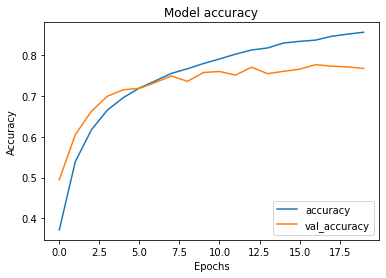

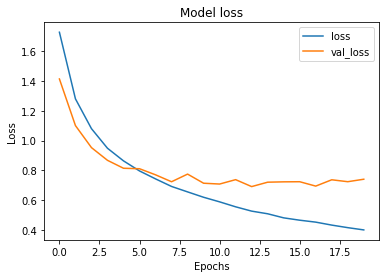

In [ ]:
plt.figure()
plt.plot(historycn.history['accuracy'], label='accuracy')
plt.plot(historycn.history['val_accuracy'], label='val_accuracy')
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()

plt.figure()
plt.plot(historycn.history['loss'], label='loss')
plt.plot(historycn.history['val_loss'], label='val_loss')
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'upper right')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

outputTestcn = modelcn.predict(testX)

In [ ]:
cmcn = confusion_matrix(np.argmax(testY, axis=1),np.argmax(outputTestcn, axis=1))
print(cmcn)

[[819  14  31  17  21   6  16  14  42  20]
 [  9 882   4   3   2   3  13   3  22  59]
 [ 64   5 576  42 119  76  70  27  10  11]
 [ 14  12  52 491  86 188  93  39  13  12]
 [ 10   2  26  29 789  35  40  61   8   0]
 [  9   4  25 126  43 703  29  48   6   7]
 [  4   4  21  20  59  16 868   2   4   2]
 [ 12   2  22  23  52  38  10 836   3   2]
 [ 59  13  10   8   5   4   8   3 872  18]
 [ 29  62   7  11   5   3   2  15  22 844]]


In [ ]:
def plot_confusion_matrix(cm, num_classes,normalize=False,title='Matrix de Confusion',cmap=plt.cm.Greens):
      
      import itertools
      
      classes = ['avión', 'automóvil', 'pájaro','gato', 'ciervo', 'perro','rana', 'caballo', 'embarcación','camión']

      plt.figure(figsize = (7,7))
      plt.imshow(cm, interpolation='nearest', cmap=cmap)
      plt.title(title)
      plt.colorbar()
      tick_marks = np.arange(len(classes))
      plt.xticks(tick_marks, classes, rotation=90)
      plt.yticks(tick_marks, classes)
      if normalize:
          cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
          cm = np.round(cm,2)
      thresh = cm.max() / 2.
      for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, cm[i, j],
                   horizontalalignment="center",
                   color="white" if cm[i, j] > thresh else "black")
      plt.tight_layout()
      plt.ylabel('Original')
      plt.xlabel('Predicciones')

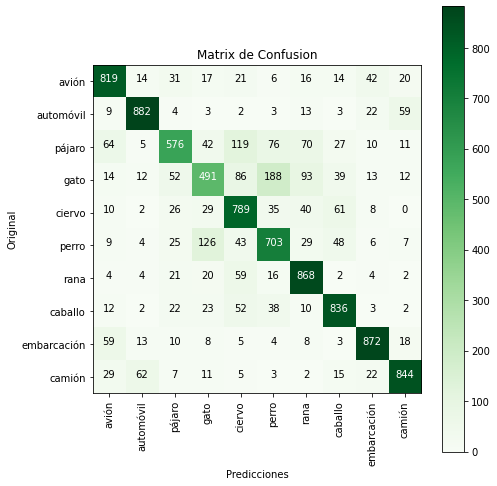

In [ ]:
plot_confusion_matrix(cmcn, num_class)